In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=2


In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
%matplotlib inline
from IPython import display

In [5]:
from cuml.manifold.umap import UMAP as cumlUMAP

In [6]:
all_x = np.load(DATA_DIR / 'starling_128_numpy' / 'all_specs.npy')

In [7]:
x1, x2, x3 = np.load(DATA_DIR / 'starling_128_numpy' / 'j-points.npy')

In [8]:
np.shape(all_x)

(91648, 128, 128)

### project umap

In [9]:
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms

In [10]:
import umap
print(umap.__version__)
#import umap.plot

0.4.0rc1


In [11]:
# umap
specs_flattened = flatten_spectrograms(all_x)[:10000]

In [12]:
np.shape(specs_flattened)

(10000, 16384)

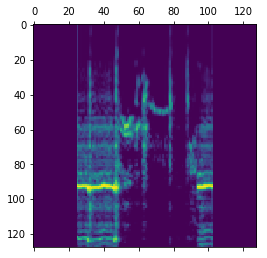

In [13]:
plt.matshow(specs_flattened[0].reshape((128,128)))

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2500)

In [16]:
pca.fit(specs_flattened)

PCA(copy=True, iterated_power='auto', n_components=2500, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [1]:
zpca = pca.transform(specs_flattened)

NameError: name 'pca' is not defined

In [18]:
proj = pca.inverse_transform(zpca[0])

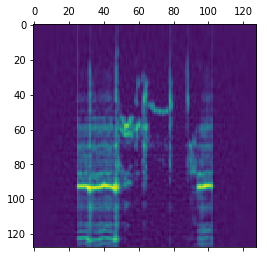

In [19]:
plt.matshow(proj.reshape((128,128)))

### map into umap

In [20]:
N_Z = 128

In [21]:
mapper = umap.UMAP(random_state=42, n_components=N_Z, verbose=True).fit(specs_flattened)

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=128, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Thu Mar  5 16:46:24 2020 Finding Nearest Neighbors
Thu Mar  5 16:46:24 2020 Building RP forest with 10 trees
Thu Mar  5 16:46:32 2020 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	 7  /  13
	 8  /  13
Thu Mar  5 16:46:42 2020 Finished Nearest Neighbor Search
Thu Mar  5 17:06:41 2020 Co

In [22]:
z = mapper.transform(specs_flattened)

In [ ]:
f_name = DATA_DIR / 'UMAP_models' / 'starling_128_10000.npy'
ensure_dir(f_name)
pickle.dump(mapper, open(f_name, 'wb'))

In [25]:
pca_z0 = mapper.inverse_transform([z[0]])

KeyboardInterrupt: 

In [ ]:
spec_z0 = pca.inverse_transform(pca_z0)

In [ ]:
plt.matshow(spec_z0.reshape((128,128)))